In [1]:
import os
from pathlib import Path
import numpy as np
import mne
from scipy import stats

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# Import fooof for checking model fits
from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.plts.annotate import plot_annotated_model, plot_annotated_model2

# KNEE freqs
from fooof.utils.params import compute_knee_frequency

# Plotting functions
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn

import warnings
warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [199]:
# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers")
from utils import check_distribution, perform_correlation

 # SET PSD calculation and FOOOF PARAMETERS

In [7]:
f_min = 1
f_max = 45
t     = 15
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'fixed'}


# Set the vectors to store the results

In [8]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set result path
result_path = Path('/home/b1044271/Columbia/Results/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [9]:
W_Kn  = np.zeros([len(regions)-4,200])*np.nan
W_Exp = np.zeros([len(regions)-4,200])*np.nan
W_Exp2 = np.zeros([len(regions)-4,200])*np.nan
W_R2K = np.zeros([len(regions)-4,200])*np.nan
W_R2N = np.zeros([len(regions)-4,200])*np.nan


N2_Kn  = np.zeros([len(regions)-4,200])*np.nan
N2_Exp = np.zeros([len(regions)-4,200])*np.nan
N2_Exp2 = np.zeros([len(regions)-4,200])*np.nan
N2_R2K = np.zeros([len(regions)-4,200])*np.nan
N2_R2N = np.zeros([len(regions)-4,200])*np.nan

N3_Kn  = np.zeros([len(regions)-4,200])*np.nan
N3_Exp = np.zeros([len(regions)-4,200])*np.nan
N3_Exp2 = np.zeros([len(regions)-4,200])*np.nan
N3_R2K = np.zeros([len(regions)-4,200])*np.nan
N3_R2N = np.zeros([len(regions)-4,200])*np.nan

R_Kn  = np.zeros([len(regions)-4,200])*np.nan
R_Exp = np.zeros([len(regions)-4,200])*np.nan
R_Exp2 = np.zeros([len(regions)-4,200])*np.nan
R_R2K = np.zeros([len(regions)-4,200])*np.nan
R_R2N = np.zeros([len(regions)-4,200])*np.nan


# WAKEFULNESS

In [10]:
PSDs_W =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_W[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    # parameters exctract
    W_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    W_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    W_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
   
    W_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    W_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')


    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 53 power spectra.
Running FOOOFGroup across 53 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior insula_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 71 power spectra.
Running FOOOFGroup across 71 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iE

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 43 power spectra.
Running FOOOFGroup across 43 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior and middle occipital gyri_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 21 power spectra.
Running FOOOFGroup across 21 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior frontal gyrus and frontal pole_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 89 power spectra.
Running FOOOFGroup across 89 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior parietal lobule_W.edf...
EDF fi

# N2

In [11]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N2 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N2[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
       
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N2_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N2_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    N2_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    N2_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    N2_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 16 power spectra.
Running FOOOFGroup across 16 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior frontal gyrus and frontal pole_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 78 power spectra.
Running FOOOFGroup across 78 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior parietal lobule_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 40 power spectra.
Running FOOOFGroup across 40 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior temporal gyrus_N.edf...
EDF file detected
Setting channel info struc

In [73]:
EEG = mne.io.read_raw_edf(data_path / dataset / V)

TypeError: unsupported operand type(s) for /: 'PosixPath' and 'float'

# N3

In [12]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N3 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N3[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N3_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N3_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    N3_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    N3_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    N3_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 16 power spectra.
Running FOOOFGroup across 16 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior frontal gyrus and frontal pole_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 78 power spectra.
Running FOOOFGroup across 78 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior parietal lobule_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 40 power spectra.
Running FOOOFGroup across 40 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior temporal gyrus_D.edf...
EDF file detected
Setting channel info struc

# REM 

In [13]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_R =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_R[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
     
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    # parameters exctract
    R_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    R_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    R_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    R_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    R_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 42 power spectra.
Running FOOOFGroup across 42 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 19 power spectra.
Running FOOOFGroup across 19 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 35 power spectra.
Running FOOOFGroup across 35 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Calcar

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 14 power spectra.
Running FOOOFGroup across 14 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior frontal gyrus and frontal pole_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 64 power spectra.
Running FOOOFGroup across 64 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior parietal lobule_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 36 power spectra.
Running FOOOFGroup across 36 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior temporal gyrus_R.edf...
EDF file detected
Setting channel info st

In [28]:
len(EEG_psd._freqs)

661

# SAVE DATA

In [15]:
# SAVING

# Helper function for paths, check for the path and creates ones if not found
def check_path(path):
    if not os.path.exists(path):
        os.mkdir(path)

check_path(result_path)

# SAVE PSDs
np.save(Path(result_path /'iEEG_t15_F45_W.npy'),PSDs_W)
np.save(Path(result_path /'iEEG_t15_F45_N2.npy'),PSDs_N2)
np.save(Path(result_path /'iEEG_t15_F45_N3.npy'),PSDs_N3)
np.save(Path(result_path /'iEEG_t15_F45_R.npy'),PSDs_R)

# SAVE EXPs of the KNEE
np.save(Path(result_path /'iEEG_t15_F45_ExpK_W.npy'),W_Exp)
np.save(Path(result_path /'iEEG_t15_F45_ExpK_N2.npy'),N2_Exp)
np.save(Path(result_path /'iEEG_t15_F45_ExpK_N3.npy'),N3_Exp)
np.save(Path(result_path /'iEEG_t15_F45_ExpK_R.npy'),R_Exp)

# SAVE KNEE VALUEs
np.save(Path(result_path /'iEEG_t15_F45_KK_W.npy'),W_Kn)
np.save(Path(result_path /'iEEG_t15_F45_KK_N2.npy'),N2_Kn)
np.save(Path(result_path /'iEEG_t15_F45_KK_N3.npy'),N3_Kn)
np.save(Path(result_path /'iEEG_t15_F45_KK_R.npy'),R_Kn)

# SAVE EXPs OF THE FIXED MODEL
np.save(Path(result_path /'iEEG_t15_F45_ExpF_W.npy'),W_Exp2)
np.save(Path(result_path /'iEEG_t15_F45_ExpF_N2.npy'),N2_Exp2)
np.save(Path(result_path /'iEEG_t15_F45_ExpF_N3.npy'),N3_Exp2)
np.save(Path(result_path /'iEEG_t15_F45_ExpF_R.npy'),R_Exp2)

# SAVE R2 VALUEs of Knee model
np.save(Path(result_path /'iEEG_t15_F45_R2K_W.npy'),W_R2K)
np.save(Path(result_path /'iEEG_t15_F45_R2K_N2.npy'),N2_R2K)
np.save(Path(result_path /'iEEG_t15_F45_R2K_N3.npy'),N3_R2K)
np.save(Path(result_path /'iEEG_t15_F45_R2K_R.npy'),R_R2K)

# SAVE R2 values OF THE FIXED MODEL
np.save(Path(result_path /'iEEG_t15_F45_R2F_W.npy'),W_R2N)
np.save(Path(result_path /'iEEG_t15_F45_R2F_N2.npy'),N2_R2N)
np.save(Path(result_path /'iEEG_t15_F45_R2F_N3.npy'),N3_R2N)
np.save(Path(result_path /'iEEG_t15_F45_R2F_R.npy'),R_R2N)

# SAVE FREQS ARRAY
np.save(Path(result_path /'iEEG_t15_F45_Freqs.npy'),EEG_psd.freqs)



## START FROM HERE TO LOAD DATA AND PLOT

In [14]:
saved = 0
PSD_R = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_R.npy') 
PSD_W = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_W.npy') 
PSD_N2 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N2.npy') 
PSD_N3 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N3.npy') 

Freqs = np.load('/home/b1044271/Columbia/Results/iEEG/' + 'iEEG_t15_F45_Freqs.npy')  

# PLOTTING

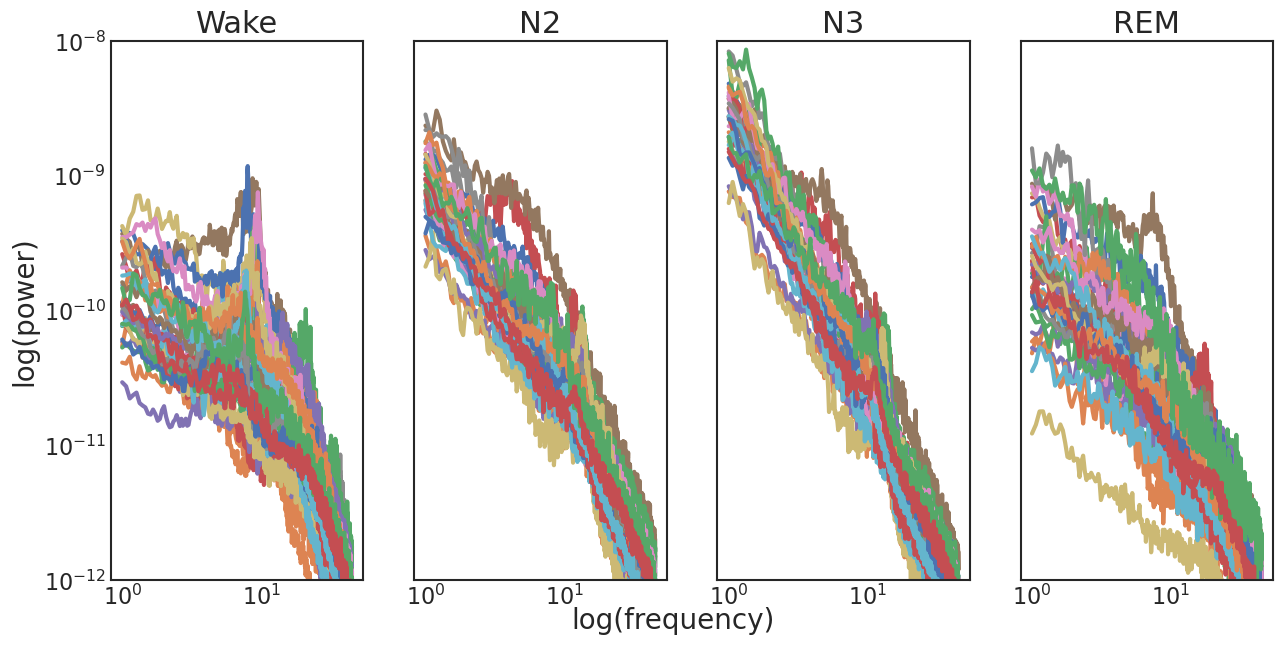

In [47]:
array_list = [PSD_W,PSD_N2, PSD_N3 ,PSD_R]

titles =  ['Wake','N2','N3' ,'REM']
# Plotting
#fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 6)) # create a subplot
fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(15,7.))
#fig.subplots_adjust(hspace=0.5, wspace=0.7)
#fig.subplots(sharex=True, sharey=True)

for i, V in enumerate(array_list):
    
    ax[i].loglog(EEG_psd._freqs,np.transpose(V), linewidth=3)
    #ax = fig.add_subplot()

    #ax.loglog(np.transpose(V))
    #ax.set_xlabel('log(Frequency)')
    #ax.set_ylabel('log(Power)')
    ax[i].set_title(titles[i], fontsize =22)
    ax[i].set_ylim([10e-13 ,10e-9])
    #ax[0,i].set_xlim([np.log(np.min(Freqs)), np.log(np.min(Freqs))])

fig.text(0.5, 0.04, 'log(frequency)', ha='center', fontsize = 20)
ax[0].set_ylabel('log(power)', fontsize = 20)

for axs in ax.flatten():
   # axs.spines['top'].set_visible(False)
   # axs.spines['right'].set_visible(False)
    axs.spines['top'].set_linewidth(1.5)
    axs.spines['right'].set_linewidth(1.5)
    axs.spines['bottom'].set_linewidth(1.5)
    axs.spines['left'].set_linewidth(1.5)   # Set the linewidth of the left axis line
    axs.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_slope_knee_regions.svg", dpi = 600)


In [36]:
# Compute knee frequency
Kn_W = compute_knee_frequency(W_Kn, W_Exp)
Kn_N2 = compute_knee_frequency(N2_Kn, N2_Exp)
Kn_N3 = compute_knee_frequency(N3_Kn, N3_Exp)
Kn_R = compute_knee_frequency(R_Kn, R_Exp)

In [143]:
Knee_av_array=[]
fm1 = FOOOF(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, PSD_Wm, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
Knee_av_array.append(compute_knee_frequency(fm1.get_params('aperiodic_params','knee'), fm1.get_params('aperiodic_params','exponent'))) 

fm1 = FOOOF(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, PSD_N2m, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
Knee_av_array.append(compute_knee_frequency(fm1.get_params('aperiodic_params','knee'), fm1.get_params('aperiodic_params','exponent'))) 

fm1 = FOOOF(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, PSD_N3m, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
Knee_av_array.append(compute_knee_frequency(fm1.get_params('aperiodic_params','knee'), fm1.get_params('aperiodic_params','exponent'))) 

fm1 = FOOOF(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, PSD_Rm, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
Knee_av_array.append(compute_knee_frequency(fm1.get_params('aperiodic_params','knee'), fm1.get_params('aperiodic_params','exponent'))) 


In [147]:
kp2 = [PSD_Wm[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[0]]] ,
    PSD_N2m[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[1]]] ,
    PSD_N3m[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[2]]],
    PSD_Rm[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[3]]]]

kp21 = [item for sublist in kp2 for item in sublist]
kp21

[]

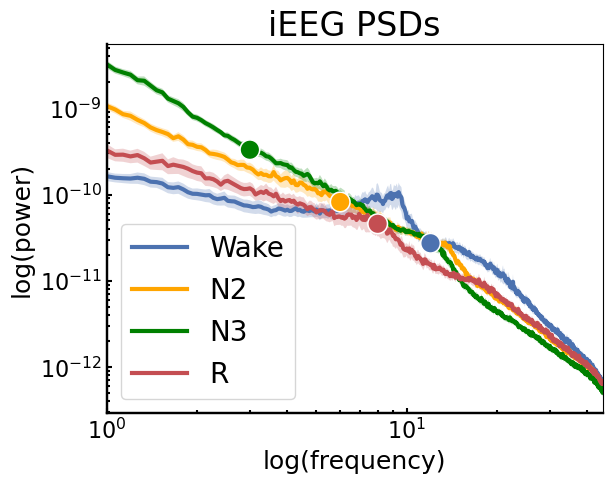

In [264]:
array_list = [PSD_W, PSD_R,PSD_N2, PSD_N3]
#fig = plt.figure(figsize=(12, 10))    
#ax = fig.add_subplot(1, 1, 1) 

PSD_Ws = stats.sem(PSD_W,0, nan_policy = 'omit')
PSD_Wm = np.nanmean(PSD_W,axis=0)

PSD_Rs = stats.sem(PSD_R,0, nan_policy = 'omit')
PSD_Rm = np.nanmean(PSD_R,axis=0)

PSD_N2s = stats.sem(PSD_N2,0, nan_policy = 'omit')
PSD_N2m = np.nanmean(PSD_N2,axis=0)

PSD_N3s = stats.sem(PSD_N3,0, nan_policy = 'omit')
PSD_N3m = np.nanmean(PSD_N3,axis=0)

# FIND APPROX POSITION OF KNEE in PSD 
kp1 = [PSD_Wm[[iv for iv in range(len(Freqs)) if Freqs[iv] == np.round(np.nanmean(Kn_W))]] ,
    PSD_N2m[[iv for iv in range(len(Freqs)) if Freqs[iv] == np.round(np.nanmean(Kn_N2))]] ,
    PSD_N3m[[iv for iv in range(len(Freqs)) if Freqs[iv] == np.round(np.nanmean(Kn_N3))] ],
    PSD_Rm[[iv for iv in range(len(Freqs)) if Freqs[iv] == np.round(np.nanmean(Kn_R))] ]]

kp = [item for sublist in kp1 for item in sublist]

kf = [np.round(np.nanmean(Kn_W)),np.round(np.nanmean(Kn_N2)),np.round(np.nanmean(Kn_N3)),np.round(np.nanmean(Kn_R))]


plt.plot(EEG_psd._freqs,PSD_Wm, 'b', label='Wake', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_Wm-PSD_Ws, PSD_Wm+PSD_Ws,facecolor='b', alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_N2m, 'orange', label='N2', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_N2m-PSD_N2s, PSD_N2m+PSD_N2s,facecolor='orange', alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_N3m, 'green', label='N3', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_N3m-PSD_N3s, PSD_N3m+PSD_N3s,facecolor='green', alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_Rm, 'r', label='R', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_Rm-PSD_Rs, PSD_Rm+PSD_Rs,facecolor='r', alpha=0.25)

# PLOT AVERAGE KNEE FREQUENCY Value
seaborn.scatterplot(x=kf, y=kp, marker='o', color=['b','orange','green','r'], s=200, zorder=4, legend=False)

plt.ylabel('log(power)', fontsize=18)
plt.title('iEEG PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd._freqs[0], EEG_psd._freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Group_PSDs.svg", dpi = 600)
plt.show()

In [ ]:
def plot_annotated_model(fm, plt_log=False, annotate_peaks=True, annotate_aperiodic=True,
                         ax=None, plot_style=style_spectrum_plot):
    """Plot a an annotated power spectrum and model, from a FOOOF object.

    Parameters
    ----------
    fm : FOOOF
        FOOOF object, with model fit, data and settings available.
    plt_log : boolean, optional, default: False
        Whether to plot the frequency values in log10 spacing.
    ax : matplotlib.Axes, optional
        Figure axes upon which to plot.
    plot_style : callable, optional, default: style_spectrum_plot
        A function to call to apply styling & aesthetics to the plots.

    Raises
    ------
    NoModelError
        If there are no model results available to plot.
    """

    # Check that model is available
    if not fm.has_model:
        raise NoModelError("No model is available to plot, can not proceed.")

    # Settings
    fontsize = 15
    lw1 = 4.0
    lw2 = 3.0
    ms1 = 12

    # Create the baseline figure
    ax = check_ax(ax, PLT_FIGSIZES['spectral'])
    fm.plot(plot_peaks='dot-shade-width', plt_log=plt_log, ax=ax, plot_style=None,
            data_kwargs={'lw' : lw1, 'alpha' : 0.6},
            aperiodic_kwargs={'lw' : lw1, 'zorder' : 10},
            model_kwargs={'lw' : lw1, 'alpha' : 0.5},
            peak_kwargs={'dot' : {'color' : PLT_COLORS['periodic'], 'ms' : ms1, 'lw' : lw2},
                         'shade' : {'color' : PLT_COLORS['periodic']},
                         'width' : {'color' : PLT_COLORS['periodic'], 'alpha' : 0.75, 'lw' : lw2}})

    # Get freqs for plotting, and convert to log if needed
    freqs = fm.freqs if not plt_log else np.log10(fm.freqs)

    ## Buffers: for spacing things out on the plot (scaled by plot values)
    x_buff1 = max(freqs) * 0.1
    x_buff2 = max(freqs) * 0.25
    y_buff1 = 0.15 * np.ptp(ax.get_ylim())
    shrink = 0.1

    # There is a bug in annotations for some perpendicular lines, so add small offset
    #   See: https://github.com/matplotlib/matplotlib/issues/12820. Fixed in 3.2.1.
    bug_buff = 0.000001

    if annotate_peaks:

        # Extract largest peak, to annotate, grabbing gaussian params
        gauss = get_band_peak_fm(fm, fm.freq_range, attribute='gaussian_params')

        peak_ctr, peak_hgt, peak_wid = gauss
        bw_freqs = [peak_ctr - 0.5 * compute_fwhm(peak_wid),
                    peak_ctr + 0.5 * compute_fwhm(peak_wid)]

        if plt_log:
            peak_ctr = np.log10(peak_ctr)
            bw_freqs = np.log10(bw_freqs)

        peak_top = fm.power_spectrum[nearest_ind(freqs, peak_ctr)]

        # Annotate Peak CF
        ax.annotate('Center Frequency',
                    xy=(peak_ctr, peak_top),
                    xytext=(peak_ctr, peak_top+np.abs(0.6*peak_hgt)),
                    verticalalignment='center',
                    horizontalalignment='center',
                    arrowprops=dict(facecolor=PLT_COLORS['periodic'], shrink=shrink),
                    color=PLT_COLORS['periodic'], fontsize=fontsize)

        # Annotate Peak PW
        ax.annotate('Power',
                    xy=(peak_ctr, peak_top-0.3*peak_hgt),
                    xytext=(peak_ctr+x_buff1, peak_top-0.3*peak_hgt),
                    verticalalignment='center',
                    arrowprops=dict(facecolor=PLT_COLORS['periodic'], shrink=shrink),
                    color=PLT_COLORS['periodic'], fontsize=fontsize)

        # Annotate Peak BW
        bw_buff = (peak_ctr - bw_freqs[0])/2
        ax.annotate('Bandwidth',
                    xy=(peak_ctr-bw_buff+bug_buff, peak_top-(0.5*peak_hgt)),
                    xytext=(peak_ctr-bw_buff, peak_top-(1.5*peak_hgt)),
                    verticalalignment='center',
                    horizontalalignment='right',
                    arrowprops=dict(facecolor=PLT_COLORS['periodic'], shrink=shrink),
                    color=PLT_COLORS['periodic'], fontsize=fontsize, zorder=20)

    if annotate_aperiodic:

        # Annotate Aperiodic Offset
        #   Add a line to indicate offset, without adjusting plot limits below it
        ax.set_autoscaley_on(False)
        ax.plot([freqs[0], freqs[0]], [ax.get_ylim()[0], fm.fooofed_spectrum_[0]],
                color=PLT_COLORS['aperiodic'], linewidth=lw2, alpha=0.5)
        ax.annotate('Offset',
                    xy=(freqs[0]+bug_buff, fm.power_spectrum[0]-y_buff1),
                    xytext=(freqs[0]-x_buff1, fm.power_spectrum[0]-y_buff1),
                    verticalalignment='center',
                    horizontalalignment='center',
                    arrowprops=dict(facecolor=PLT_COLORS['aperiodic'], shrink=shrink),
                    color=PLT_COLORS['aperiodic'], fontsize=fontsize)

        # Annotate Aperiodic Knee
        if fm.aperiodic_mode == 'knee':

            # Find the knee frequency point to annotate
            knee_freq = compute_knee_frequency(fm.get_params('aperiodic', 'knee'),
                                               fm.get_params('aperiodic', 'exponent'))
            knee_freq = np.log10(knee_freq) if plt_log else knee_freq
            knee_pow = fm.power_spectrum[nearest_ind(freqs, knee_freq)]

            # Add a dot to the plot indicating the knee frequency
            ax.plot(knee_freq, knee_pow, 'o', color=PLT_COLORS['aperiodic'], ms=ms1*1.5, alpha=0.7)

            ax.annotate('Knee',
                        xy=(knee_freq, knee_pow),
                        xytext=(knee_freq-x_buff2, knee_pow-y_buff1),
                        verticalalignment='center',
                        arrowprops=dict(facecolor=PLT_COLORS['aperiodic'], shrink=shrink),
                        color=PLT_COLORS['aperiodic'], fontsize=fontsize)

        # Annotate Aperiodic Exponent
        mid_ind = int(len(freqs)/2)
        ax.annotate('Exponent',
                    xy=(freqs[mid_ind], fm.power_spectrum[mid_ind]),
                    xytext=(freqs[mid_ind]-x_buff2, fm.power_spectrum[mid_ind]-y_buff1),
                    verticalalignment='center',
                    arrowprops=dict(facecolor=PLT_COLORS['aperiodic'], shrink=shrink),
                    color=PLT_COLORS['aperiodic'], fontsize=fontsize)

    # Apply style to plot & tune grid styling
    check_n_style(plot_style, ax, plt_log, True)
    ax.grid(True, alpha=0.5)

    # Add labels to plot in the legend
    da_patch = mpatches.Patch(color=PLT_COLORS['data'], label='Original Data')
    ap_patch = mpatches.Patch(color=PLT_COLORS['aperiodic'], label='Aperiodic Parameters')
    pe_patch = mpatches.Patch(color=PLT_COLORS['periodic'], label='Peak Parameters')
    mo_patch = mpatches.Patch(color=PLT_COLORS['model'], label='Full Model')

    handles = [da_patch, ap_patch if annotate_aperiodic else None,
               pe_patch if annotate_peaks else None, mo_patch]
    handles = [el for el in handles if el is not None]

    ax.legend(handles=handles, handlelength=1, fontsize='x-large')



In [185]:
from fooof.plts.style import check_n_style, style_spectrum_plot
style_spectrum_plot?

# Plot PSDs of the different stages with model annotations

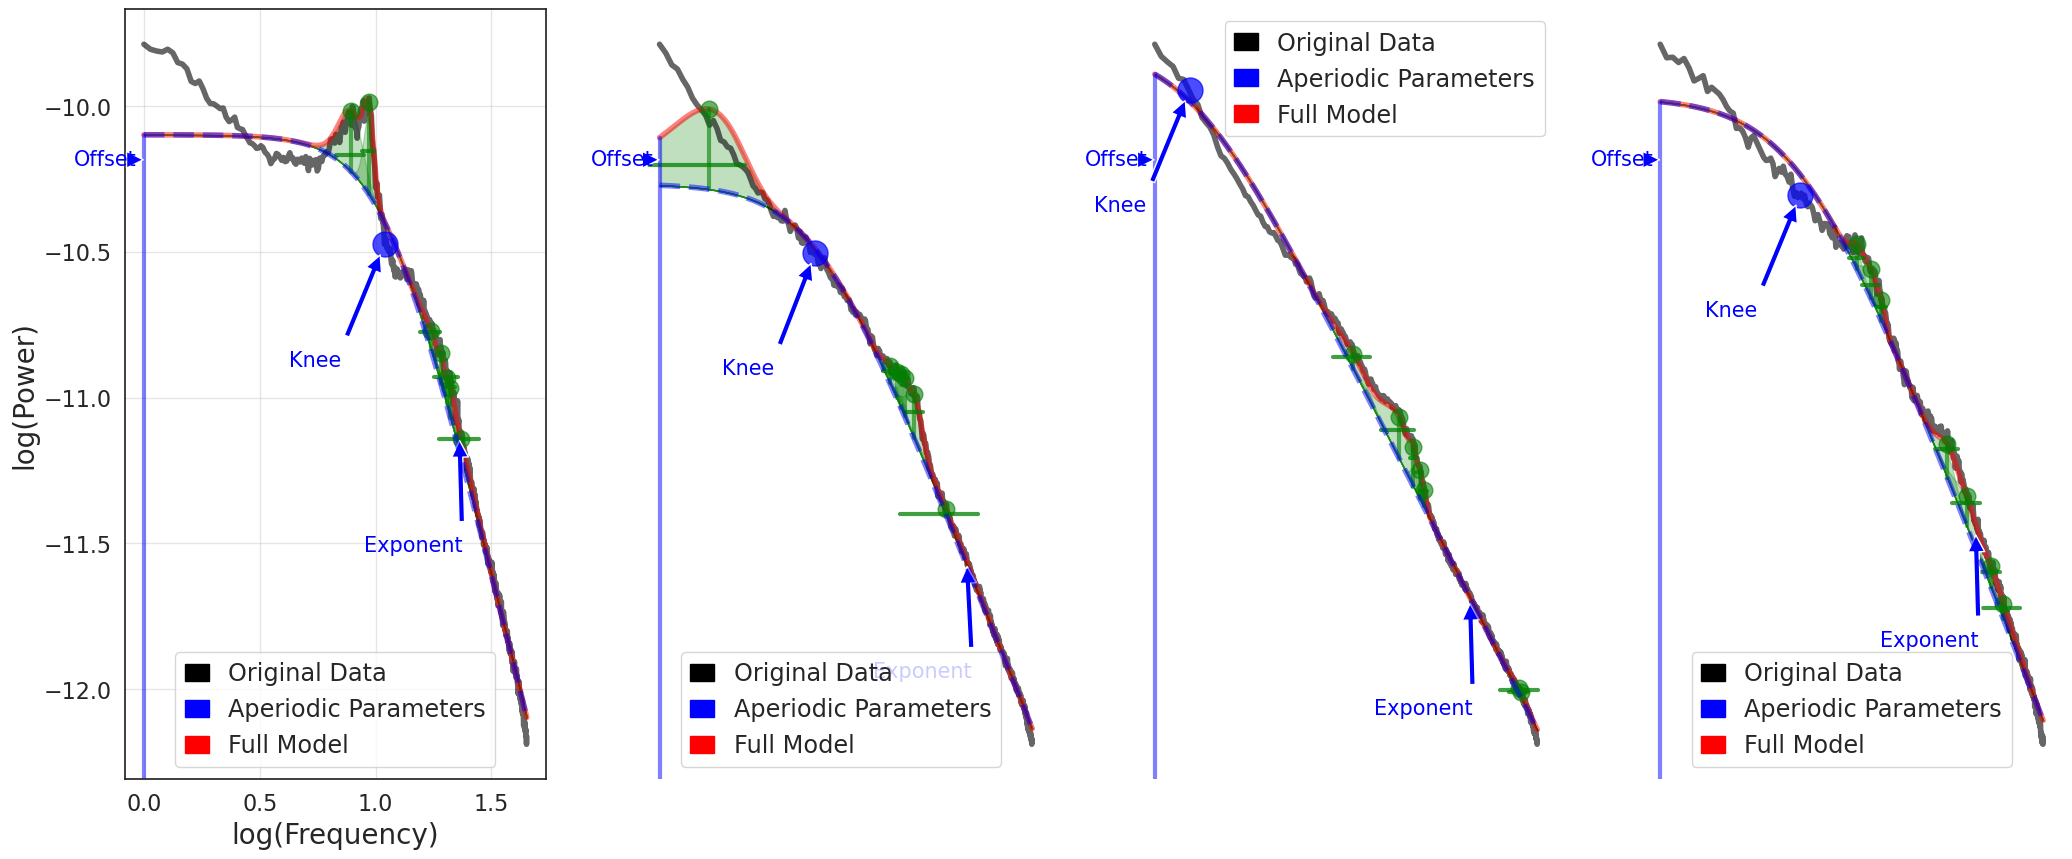

In [190]:
array_list = [PSD_W,PSD_N2, PSD_N3 ,PSD_R]
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
#axes = iter(make_axes(4, 4, figsize=(15, 7)))
titles =  ['Wake','N2','N3' ,'REM']

axes = iter(make_axes(1, 4, figsize=(25, 10)))

for i, V in enumerate(array_list):
    
    X = np.nanmean(V,0)
    fmX = FOOOF(**SETTINGS_F1)
    fmX.fit(EEG_psd._freqs, X, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    plot_annotated_model(fmX, plt_log = True, ax = next(axes), annotate_peaks = False)

Name = '/home/b1044271/Columbia/Plots/NOV23/iEEG_Group_PSDs_annotated.svg'   
plt.savefig(Name, dpi = 600)

#   plt.xlim(np.log(EEG_psd._freqs[0]) , np.log(EEG_psd._freqs[-1]))
#   ax.set_xlabel('log(Frequency)')
#   ax.set_ylabel('log(Power)')   
#   ax.title.set_text(titles[i])
#   ax.set_ylim([10e-12 ,10e-9])
#   ax.set_xlim([np.log(np.min(Freqs)), np.log(np.min(Freqs))])

In [171]:
i =1
titles =  ['Wake','N2','N3' ,'REM']
Name = '/home/b1044271/Columbia/Plots/NOV23/iEEG_Group_PSDs_W_annotated.svg' + titles[0]
Name

'/home/b1044271/Columbia/Plots/NOV23/iEEG_Group_PSDs_W_annotated.svgWake'

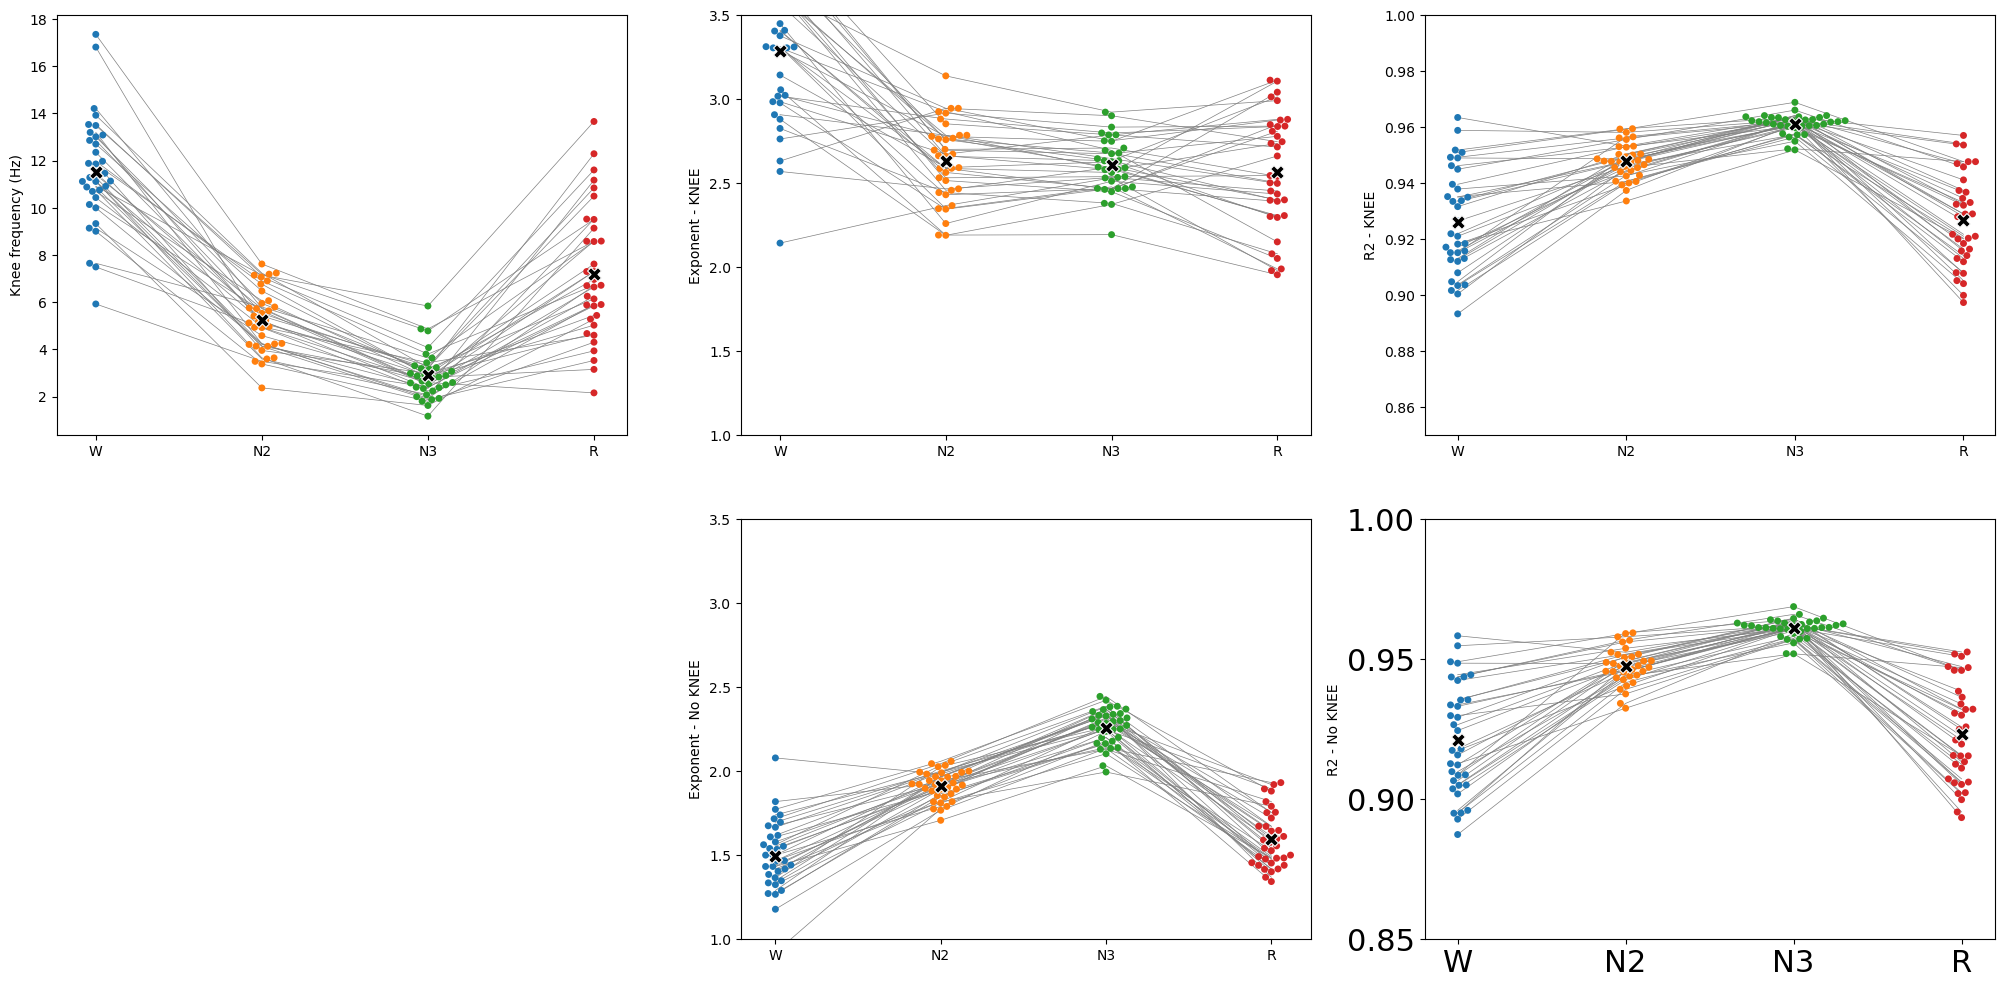

In [19]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)]
array_list3 = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
array_list4 = [np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1)]
array_list5 = [np.nanmean(W_R2K,1), np.nanmean(N2_R2K,1), np.nanmean(N3_R2K,1), np.nanmean(R_R2K,1)]
array_list6 = [np.nanmean(W_R2N,1), np.nanmean(N2_R2N,1), np.nanmean(N3_R2N,1), np.nanmean(R_R2N,1)]

titles =  ['W','N2','N3','R']

fig = plt.figure(figsize=(25, 12))  

ax = fig.add_subplot(2, 3, 1)

# KNEE FREQUENCY
ax = seaborn.swarmplot(data=array_list2)
ax.set(ylabel='Knee frequency (Hz)')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list2,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list2[0], array_list2[1], array_list2[2], array_list2[3]], color = 'grey', linewidth = 0.5, linestyle = '-')

# EXPONENT - KNEE MODEL
ax = fig.add_subplot(2, 3, 2)
ax = seaborn.swarmplot(data=array_list3)
ax.set(ylabel='Exponent - KNEE')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list3,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list3[0], array_list3[1], array_list3[2], array_list3[3]], color = 'grey', linewidth = 0.5, linestyle = '-')
plt.ylim([1 ,3.5])

# R2 - KNEE MODEL
ax = fig.add_subplot(2, 3, 3)
ax = seaborn.swarmplot(data=array_list5)
ax.set(ylabel='R2 - KNEE')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list5,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list5[0], array_list5[1], array_list5[2], array_list5[3]], color = 'grey', linewidth = 0.5, linestyle = '-');
plt.ylim([0.85 ,1])

# EXPONENT - NO KNEE MODEL
ax = fig.add_subplot(2, 3, 5)
ax = seaborn.swarmplot(data=array_list4)
ax.set(ylabel='Exponent - No KNEE')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list4,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list4[0], array_list4[1], array_list4[2], array_list4[3]], color = 'grey', linewidth = 0.5, linestyle = '-');
plt.ylim([1 ,3.5])

# R2 - NO KNEE MODEL
ax = fig.add_subplot(2, 3, 6)
ax = seaborn.swarmplot(data=array_list6)
ax.set(ylabel='R2 - No KNEE')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list6,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list6[0], array_list6[1], array_list6[2], array_list6[3]], color = 'grey', linewidth = 0.5, linestyle = '-');
plt.ylim([0.85 ,1])

plt.tick_params(axis='both', which='major', labelsize=22)


#plt.savefig("iEEG_slope_knee_noknee.svg")


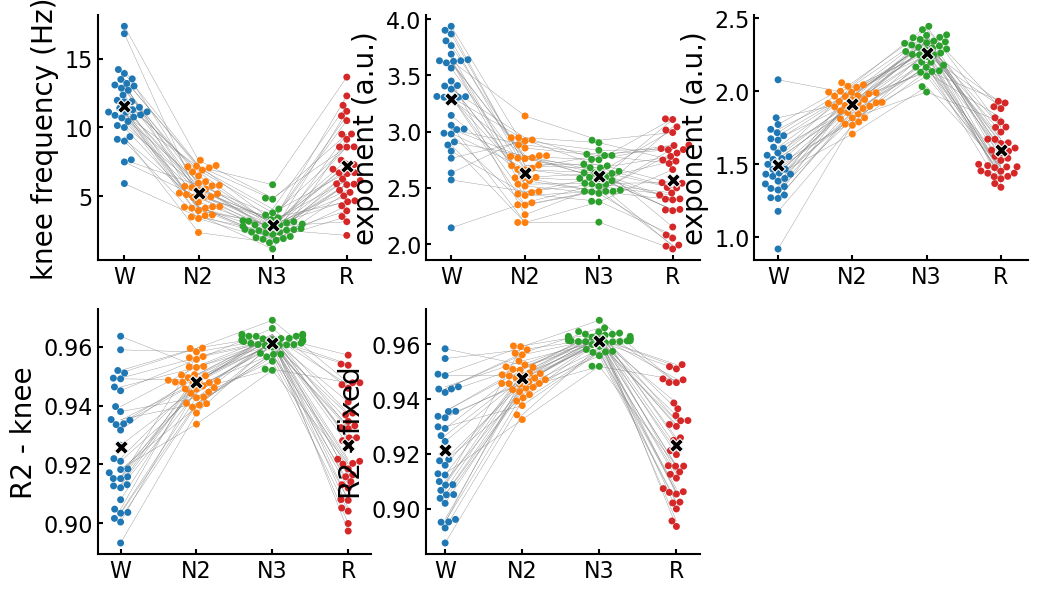

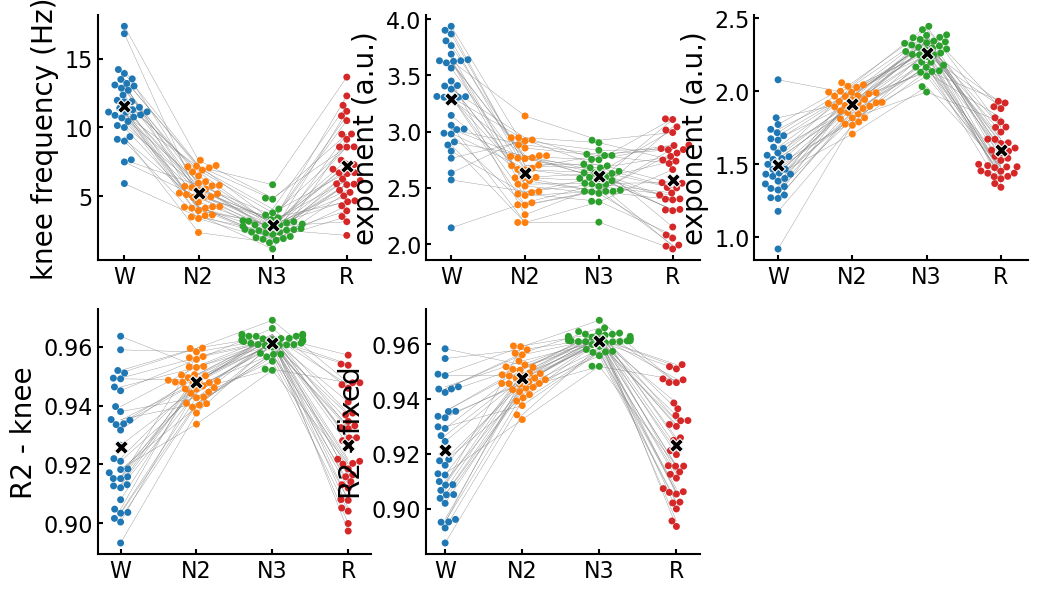

In [309]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)]
array_list3 = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
array_list4 = [np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1)]
array_list5 = [np.nanmean(W_R2K,1), np.nanmean(N2_R2K,1), np.nanmean(N3_R2K,1), np.nanmean(R_R2K,1)]
array_list6 = [np.nanmean(W_R2N,1), np.nanmean(N2_R2N,1), np.nanmean(N3_R2N,1), np.nanmean(R_R2N,1)]

arrays = [array_list2, array_list3, array_list4, array_list5, array_list6]

titles =  ['W','N2','N3','R']
y_label = ['knee frequency (Hz)' , 'exponent (a.u.)', 'exponent (a.u.)' , 'R2 - knee', 'R2 - fixed']
fig = plt.figure(figsize=(12, 7))  
#seaborn.set_theme(style='white')


for i, V in enumerate(arrays):

    ax = fig.add_subplot(2, 3, i+1)

    # KNEE FREQUENCY
    ax = seaborn.swarmplot(data=V)
    plt.ylabel(y_label[i], fontsize = 20)
    ax.set_xticklabels(titles, fontsize = 20)
    seaborn.scatterplot(x=[0,1,2,3], y=np.mean(V,1), marker='X', color='black', s=100, zorder=4, legend=False)
    plt.plot([V[0], V[1], V[2], V[3]], color = 'grey', linewidth = 0.25, linestyle = '-')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    
plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_slope_knee_points.svg", dpi = 600)
plt.show()

In [307]:

sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# STATS KNEE FREQ

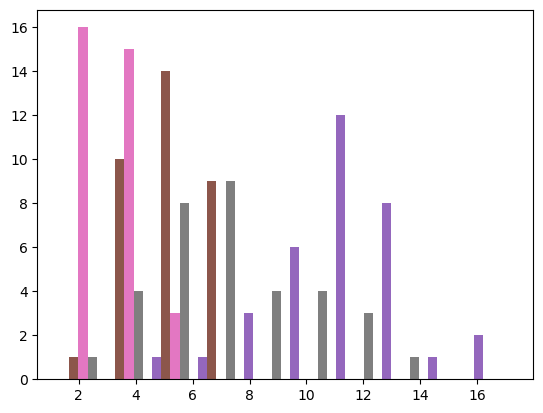

In [269]:
plt.hist([np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)])
plt.show()

In [286]:
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Perform Friedman test - Knee
statistic, p_value= friedmanchisquare(np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1))

p_value

W = statistic / (35*(4-1))


p_value


3.4486124318490823e-19

In [296]:
# Perform Friedman test - Exponent of fixed
statistic, p_value= friedmanchisquare(np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1))

W = statistic / (35*(4-1))


statistic

90.56470588235288

In [295]:
# Perform Friedman test - Exponent of knee
statistic, p_value= friedmanchisquare(np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1))

W = statistic / (35*(4-1))


p_value
W

0.4339495798319322

In [293]:
data = np.array([np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)])

#sp.posthoc_nemenyi_friedman(data.T)

sp.posthoc_conover_friedman(np.array(array_list3).T, p_adjust = 'Bonferroni')

,0,1,2,3
0,1.000000e+00,0.000080,0.000002,2.045644e-07
1,7.960032e-05,1.000000,1.000000,9.812277e-01
2,1.627524e-06,1.000000,1.000000,1.000000e+00
3,2.045644e-07,0.981228,1.000000,1.000000e+00


# STATS EXP KNEE MODEL

In [184]:
from scipy.stats import friedmanchisquare

# Perform Friedman test
statistic, p_value= friedmanchisquare(np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1))

p_value

data = np.array([np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)])

sp.posthoc_nemenyi_friedman(data.T)

,0,1,2,3
0,1.000000,0.328571,0.900000,0.900000
1,0.328571,1.000000,0.652449,0.328571
2,0.900000,0.652449,1.000000,0.900000
3,0.900000,0.328571,0.900000,1.000000


# STATS EXP FIXED MODEL

In [187]:
from scipy.stats import friedmanchisquare

# Perform Friedman test
statistic, p_value= friedmanchisquare(np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1))

p_value

data = np.array([np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1)])

sp.posthoc_nemenyi_friedman(data.T)

,0,1,2,3
0,1.000,0.001000,0.001000,0.900
1,0.001,1.000000,0.004019,0.001
2,0.001,0.004019,1.000000,0.001
3,0.900,0.001000,0.001000,1.000


# DECODING
decoding the stages using the slope and the knee of the knee model and the slope of the fixed model 


In [154]:
# repititions and 
lin_method = RepeatedStratifiedKFold (n_splits = 5, n_repeats = 2, random_state = 1)

# Set up the repeated k-fold cross-validation
lin_method = RepeatedKFold(n_splits=5, n_repeats=2)

accuracy_K=[]
accuracy_F=[]
accuracy_knee=[]
for i in np.arange(34):

    # Initialize the LDA classifier
    lda = LinearDiscriminantAnalysis()
    
    # DATA
    W_exp   = W_Exp[i][~np.isnan(W_Exp[i])]
    W_knee  = Kn_W[i][~np.isnan(Kn_W[i])]
    W_exp2  = W_Exp2[i][~np.isnan(W_Exp2[i])]
    l1k=np.ones(len(W_exp))
    l1f=np.ones(len(W_exp2))
    l1kn=np.ones(len(W_knee))

    N2_exp   = N2_Exp[i][~np.isnan(N2_Exp[i])]
    N2_knee  = Kn_N2[i][~np.isnan(Kn_N2[i])]
    N2_exp2  = N2_Exp2[i][~np.isnan(N2_Exp2[i])]
    l2k=np.ones(len(N2_exp))*2
    l2f=np.ones(len(N2_exp2))*2
    l2kn=np.ones(len(N2_knee))*2

    N3_exp   = N3_Exp[i][~np.isnan(N3_Exp[i])]
    N3_knee  = Kn_N3[i][~np.isnan(Kn_N3[i])]
    N3_exp2  = N3_Exp2[i][~np.isnan(N3_Exp2[i])]
    l3k=np.ones(len(N3_exp))*3
    l3f=np.ones(len(N3_exp2))*3
    l3kn=np.ones(len(N3_knee))*3

    R_exp   = R_Exp[i][~np.isnan(R_Exp[i])]
    R_knee  = Kn_R[i][~np.isnan(Kn_R[i])]
    R_exp2  = R_Exp2[i][~np.isnan(R_Exp2[i])]
    l4k=np.ones(len(R_exp))*4
    l4f=np.ones(len(R_exp2))*4
    l4kn=np.ones(len(R_knee))*4
    
    Knee_model  = np.concatenate((W_exp,N2_exp,N3_exp,R_exp))
    Fixed_model  = np.concatenate((W_exp2,N2_exp2,N3_exp2,R_exp2))
    Knee_value  = np.concatenate((W_knee,N2_knee,N3_knee,R_knee))

    # remove any nans
    y1 = np.concatenate((l1k,l2k,l3k,l4k))
    y2 = np.concatenate((l1f,l2f,l3f,l4f))
    y3 = np.concatenate((l1kn,l2kn,l3kn,l4kn))
    
    Z =  np.argwhere(np.isnan(Knee_model))
    Knee_model = np.delete(Knee_model,Z)
    y1 = np.delete(y1,Z)
    
    Z2 =  np.argwhere(np.isnan(Fixed_model))
    Fixed_model = np.delete(Fixed_model,Z2)
    y2 = np.delete(y2,Z2)
    
    Z3 =  np.argwhere(np.isnan(Knee_value))
    Knee_value = np.delete(Knee_value,Z3)
    y3 = np.delete(y3,Z3)
    
    # make the 1d array a 2d array (req for scikit learn)
    X=Knee_model[:, None]
    X2=Fixed_model[:, None]
    X3=Knee_value[:, None]

    # Loop over the cross-validation folds and repetitions
    lin_score = cross_val_score(lda, X, y1, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train, X_test , y_train, y_test = train_test_split(X, y1, test_size=0.2)
    # Fit the LDA model on the training data
    lda.fit(X_train, y_train)
    # Evaluate the model on the test data
    accuracy_K.append(lda.score(X_test, y_test))
    

    # Initialize the LDA classifier
    lda2 = LinearDiscriminantAnalysis()
    # Loop over the cross-validation folds and repetitions
    lin_score2 = cross_val_score(lda2, X2, y2, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train2, X_test2 , y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
    # Fit the LDA model on the training data
    lda2.fit(X_train2, y_train2)
    # Evaluate the model on the test data
    accuracy_F.append(lda2.score(X_test2, y_test2))
    
    # Initialize the LDA classifier
    lda3 = LinearDiscriminantAnalysis()
    # Loop over the cross-validation folds and repetitions
    lin_score3 = cross_val_score(lda3, X3, y3, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train3, X_test3 , y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)
    # Fit the LDA model on the training data
    lda3.fit(X_train3, y_train3)
    # Evaluate the model on the test data
    accuracy_knee.append(lda3.score(X_test3, y_test3))
    

In [155]:
  # DATA
W_exp   = W_Exp[i][~np.isnan(W_Exp[i])]
W_knee  = W_Kn[i][~np.isnan(W_Kn[i])]
W_exp2  = W_Exp2[i][~np.isnan(W_Exp2[i])]


N2_exp   = N2_Exp[i][~np.isnan(N2_Exp[i])]
N2_knee  = N2_Kn[i][~np.isnan(N2_Kn[i])]
N2_exp2  = N2_Exp2[i][~np.isnan(N2_Exp2[i])]


N3_exp   = N3_Exp[i][~np.isnan(N3_Exp[i])]
N3_knee  = N3_Kn[i][~np.isnan(N3_Kn[i])]
N3_exp2  = N3_Exp2[i][~np.isnan(N3_Exp2[i])]

R_exp   = R_Exp[i][~np.isnan(R_Exp[i])]
R_knee  = R_Kn[i][~np.isnan(R_Kn[i])]
R_exp2  = R_Exp2[i][~np.isnan(R_Exp2[i])]


# Perform Stats

In [124]:
from scipy.stats import friedmanchisquare

# Perform Friedman test
statistic= friedmanchisquare(accuracy_knee, accuracy_K, accuracy_F)

p_value

1.4182715821224518e-07

In [195]:
import scikit_posthocs as sp

data = np.array([accuracy_knee,accuracy_F,accuracy_K])


sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000,0.900,0.001
1,0.900,1.000,0.001
2,0.001,0.001,1.000


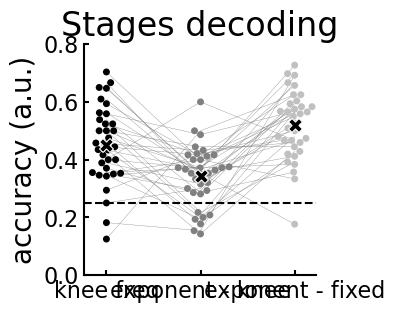

In [317]:
array_list6 = [accuracy_knee,accuracy_K, accuracy_F]
colors = ['black', 'grey', 'silver']

titles =  ['knee freq','exponent - knee','exponent - fixed']


ax = plt.figure(figsize=(3,3))  

ax = seaborn.swarmplot(data=array_list6, palette = colors);
ax.set_xticklabels(titles)

seaborn.scatterplot(x=[0,1,2], y=np.mean(array_list6,1), marker='X', color='black', s=100, zorder=4, legend=False);
plt.plot([array_list6[0], array_list6[1], array_list6[2]], color = 'grey', linewidth = 0.25, linestyle = '-');
ax.axhline(y=0.25, color='black', linestyle='--');

plt.title('Stages decoding', fontsize = 24)
plt.ylabel('accuracy (a.u.)',fontsize=20)

plt.ylim(0., 0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)


plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_decoding.svg", dpi = 600)
plt.show()

# Correlation between Knee Freq and Exp of fixed model

In [200]:
Set_Knee= np.squeeze(np.reshape(array_list2, (1,34*4)))
Set_ExpF = np.squeeze(np.reshape(array_list4, (1,34*4)))
Set_ExpK = np.squeeze(np.reshape(array_list3, (1,34*4)))

In [201]:
perform_correlation(Set_Knee,Set_ExpF)


Using Spearman correlation
Correlation: -0.8155717761557176
P-value: 1.2270325871514278e-33


In [202]:
perform_correlation(Set_Knee,Set_ExpK)


Using Spearman correlation
Correlation: 0.6988311626353704
P-value: 3.0921288697175592e-21


# PLOT CORRELATION

In [206]:
# First make a panda dataframe
import seaborn as sns
import pandas as pd

In [207]:
data = {'Knee' : Set_Knee,
       'Exp_knee' : Set_ExpK,
       'Exp_fixed' : Set_ExpF,
       'Stages' : np.repeat(['W','N2','N3','R'], 34, axis=0)}

df = pd.DataFrame(data)

<Figure size 640x480 with 0 Axes>

<Figure size 400x300 with 0 Axes>

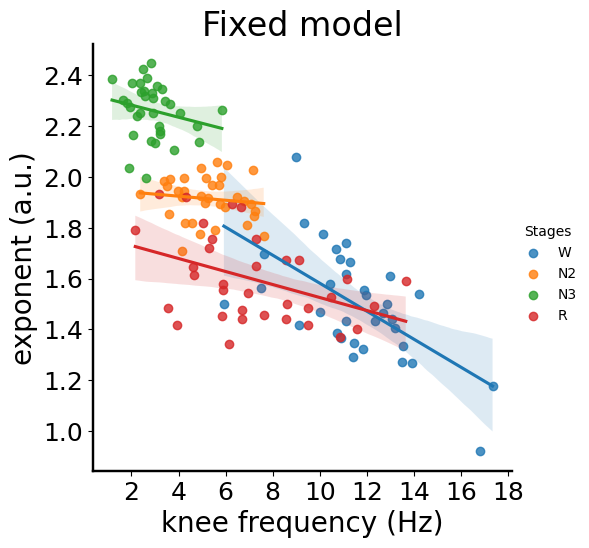

In [256]:
# PLOT correlations 
plt.figure(figsize=(4,3))  
sns.lmplot(x="Knee", y="Exp_fixed", hue="Stages", data=df);

ax=plt.gca()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('exponent (a.u.)',fontsize=20)
plt.xlabel('knee frequency (Hz)',fontsize=20)
plt.title('Fixed model', fontsize = 24)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Correlations_FixedM1.svg", dpi = 600)
plt.show()
plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Correlations_FixedM2.svg", dpi = 600)


<Figure size 640x480 with 0 Axes>

<Figure size 400x300 with 0 Axes>

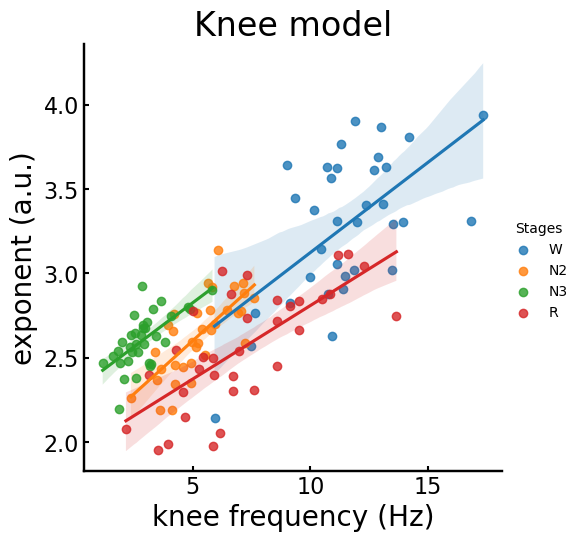

In [257]:
plt.figure(figsize=(4,3))  

sns.lmplot(x="Knee", y="Exp_knee", hue="Stages", data=df);
ax = plt.gca()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('exponent (a.u.)',fontsize=20)
plt.xlabel('knee frequency (Hz)',fontsize=20)
plt.title('Knee model', fontsize = 24)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Correlations_KneeM.svg", dpi = 600)
plt.show()

In [ ]:
palette = seaborn.set_palette("Blues_r")
#palette.reverse()
ax = seaborn.swarmplot(data=array_list6);

ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2], y=np.mean(array_list6,1), marker='X', color='black', s=100, zorder=4, legend=False);
plt.plot([array_list6[0], array_list6[1], array_list6[2]], color = 'grey', linewidth = 0.25, linestyle = '-');
ax.axhline(y=0.25, color='black', linestyle='--');

plt.title('Stages decoding', fontsize = 24)
plt.ylabel('accuracy (a.u.)',fontsize=20)

plt.ylim(0., 0.8)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)


In [63]:
a,b,v,d,c = perform_correlation(array_list2[0],array_list3[0])
perform_correlation(array_list2[1],array_list3[1])
perform_correlation(array_list2[2],array_list3[2])
perform_correlation(array_list2[3],array_list3[3])

perform_correlation(array_list2[0],array_list4[0])
perform_correlation(array_list2[1],array_list4[1])
perform_correlation(array_list2[2],array_list4[2])
perform_correlation(array_list2[3],array_list4[3])

Using Pearson correlation
Correlation: 0.5899534330402461
P-value: 0.00024055956127345802


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

In [59]:
a